# 1. Get and load the data

In [1]:
# Adapted from: http://www.tenpay.tech/questions/841382/read-csv-file-to-numpy-array-first-row-as-strings-rest-as-float
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = np.genfromtxt('iris.csv', delimiter=',', names=True, dtype='float,float,float,float,|S11')
#print('SepalLength: %s ' % data['sepalLength'])
#print('SepalWidth: %s ' % data['sepalWidth'])
#print('PetalLength: %s ' % data['petalLength'])
#print('PetalWidth: %s ' % data['petalWidth'])
#print('Species: %s ' % data['species'])

# 2. Write a note about the data set

<p> The Iris Flower Data set or the Fishers Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. </p>
<p>This data set became a typical test case for many statistical classification techniques in machine learning.</p>
<p>Adapted from [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).
    

# 3. Create a simple plot
Use pyplot to create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis. Add axis labels and a title to the plot.

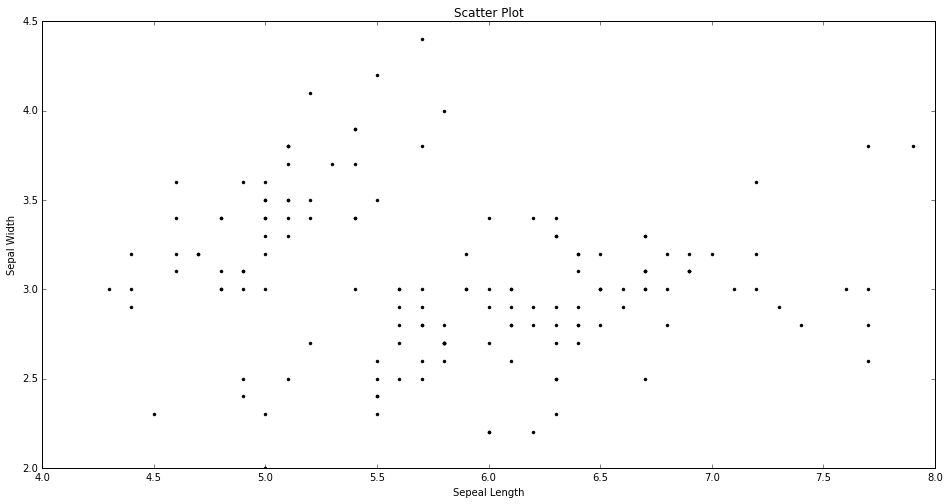

In [2]:
plt.plot(data['sepalLength'],data['sepalWidth'],'k.')
plt.title('Scatter Plot')
plt.ylabel('Sepal Width')
plt.xlabel('Sepeal Length')
plt.show()

# 4. Create a more complex plot

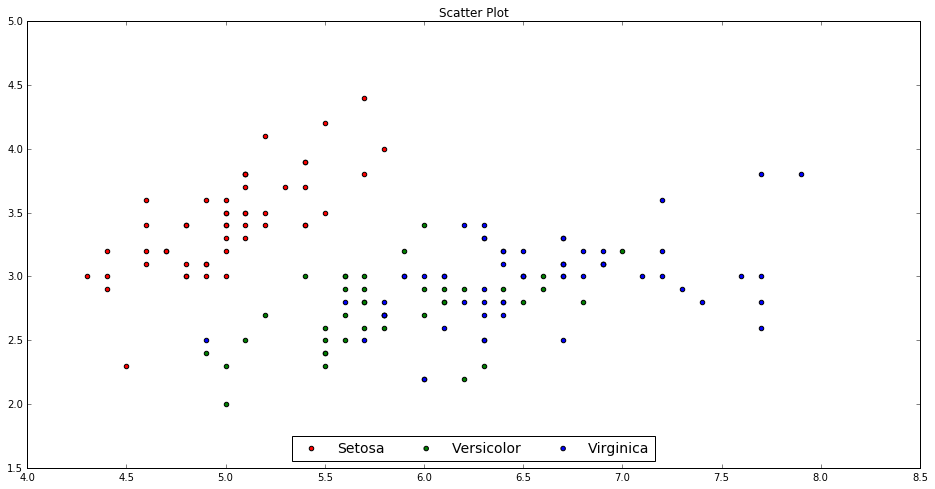

In [3]:
# Knowing the first 50 are Setosa, the next 50 are versicolor and the next 50 are virginica I was able to adapt the color to suit
for d in range(len(data['species'])):
    if data['species'][d] == data['species'][0]:
        setosa = plt.scatter(data['sepalLength'][d], data['sepalWidth'][d], c='red')
    if data['species'][d] == data['species'][50]:
        versicolor = plt.scatter(data['sepalLength'][d], data['sepalWidth'][d], c='green')
    if data['species'][d] == data['species'][100]:
        virginica = plt.scatter(data['sepalLength'][d], data['sepalWidth'][d], c='blue')
   
plt.title('Scatter Plot')    
# Legend Adapted from: https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
plt.legend((setosa, versicolor, virginica),('Setosa', 'Versicolor', 'Virginica'), 
           scatterpoints=1, 
           loc='lower center', 
           ncol=3, fontsize=14)  



# 5. Use seaborn
## Use the seaborn library to create a scatterplot matrix of all five variables.

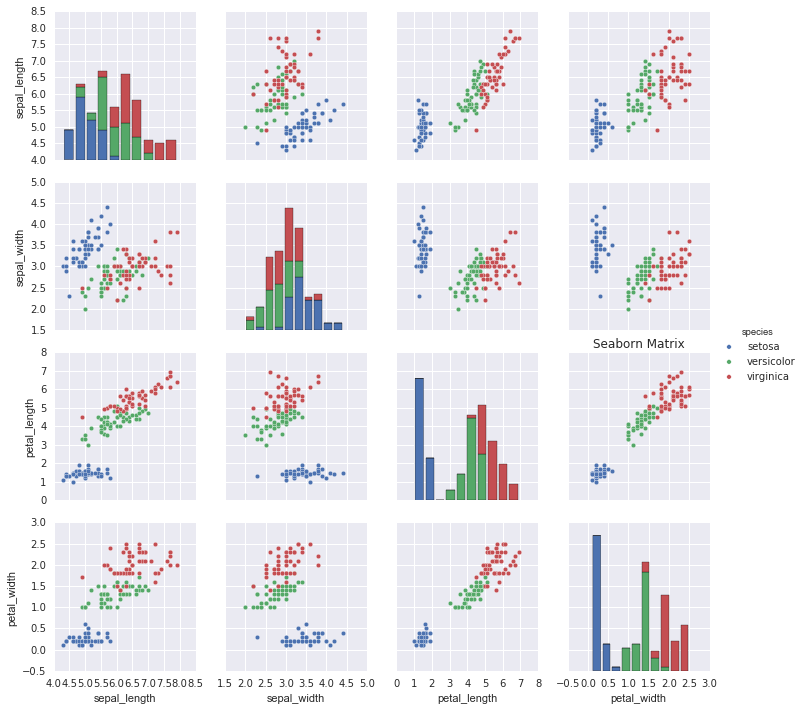

In [4]:
# Adapted http://seaborn.pydata.org/examples/scatterplot_matrix.html
import seaborn as sns

iris = sns.load_dataset("iris")

sns.set(style = "darkgrid")
sns.pairplot(iris, hue="species")
plt.title('Seaborn Matrix')



# 6. Fit a line
### Fit a straight line to the variables petal length and petal width for the whole data set. Plot the data points in a scatter plot with the best fit line shown.

Best fit is m = 0.415755 and c = -0.363076


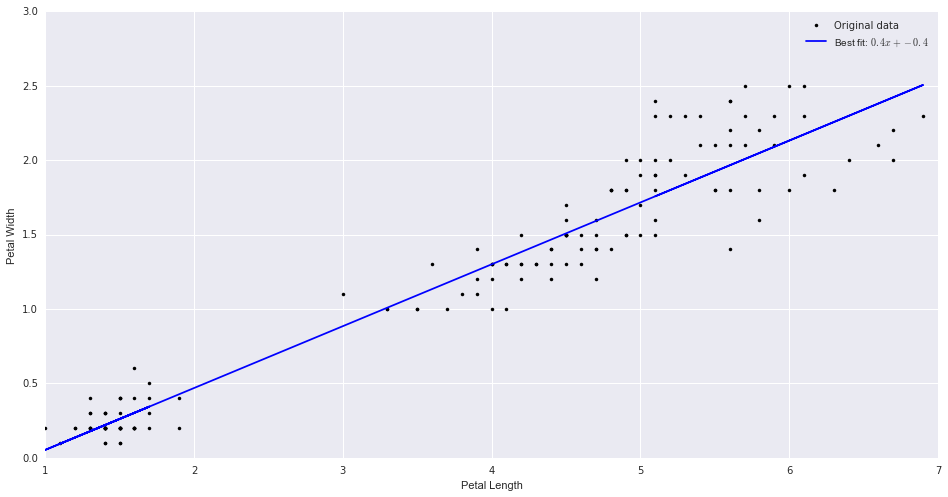

In [5]:
# Adapted From https://emerging-technologies.github.io/notebooks/simple-linear-regression.ipynb
m,c = np.polyfit(data['petalLength'], data['petalWidth'] , 1)
print("Best fit is m = %f and c = %f" % (m, c))

# Plot the best fit line.
plt.plot(data['petalLength'], data['petalWidth'], 'k.', label='Original data')
plt.plot(data['petalLength'], m * data['petalLength'] + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

# 7. Calculate the R-squared value

The R-squared value is also known as Coefficient of determination. The purpose of the R-squared value is to measure how much of the variance in  yy  is determined by  xx. The formula is as follows:  

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

In [6]:
# Adapted From https://emerging-technologies.github.io/notebooks/simple-linear-regression.ipynb

# Calculate the R-squared value for our data set.
avg_width = np.mean(data['petalWidth'])
rsq = 1.0 - (np.sum((data['petalWidth'] - m * data['petalLength'] - c)**2)/np.sum((data['petalWidth'] - avg_width)**2))
print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.9271


# 8. Fit Another Line
### Use numpy to select only the data points where species is setosa.

Best fit is m = 0.201245 and c = -0.048220


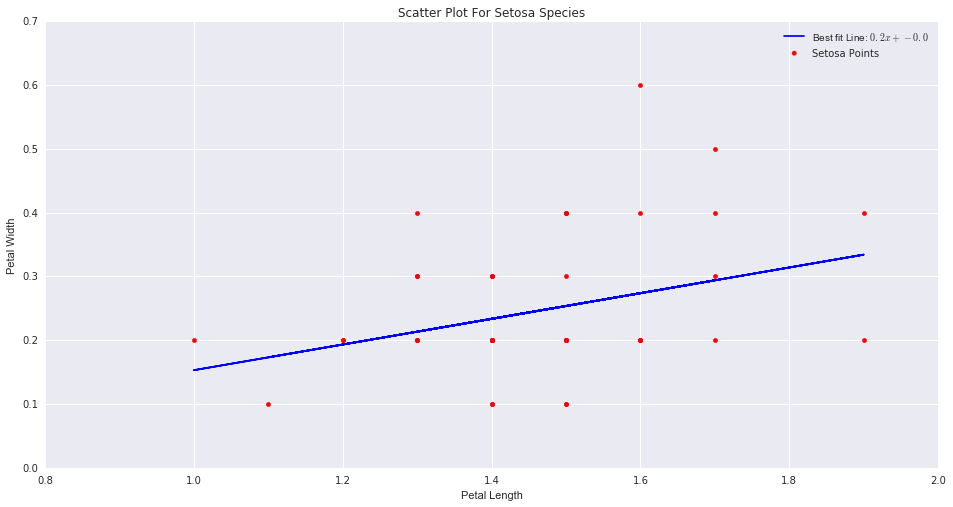

In [7]:
# Adapted From https://emerging-technologies.github.io/notebooks/simple-linear-regression.ipynb
# New arrays for petal length and width for just setosa species
newPLen = []
newPWid = []

# Only Loop over The Setosa Species and get the Petal Length and Width for Setosa and append to each array
for d in range(len(data['species']) - 100):
    newPLen.append(data['petalLength'][d])
    newPWid.append(data['petalWidth'][d])

# Convert Arrays to numpy arrays for processing
newPLen = np.array(newPLen)
newPWid = np.array(newPWid)

# Calculate m and c
m,c = np.polyfit(newPLen, newPWid, 1)
print("Best fit is m = %f and c = %f" % (m, c))

# Use a scatter plot to plot the setosa Points
plt.scatter(newPLen, newPWid, label = 'Setosa Points', color="red")
# Fit The Best Line
plt.plot(newPLen, m * newPLen + c, 'b-', label='Best fit Line: $%0.1f x + %0.1f$' % (m,c))

plt.title("Scatter Plot For Setosa Species")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

# 9. Calculate the R-squared value for the Line in part 8

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

In [8]:
# Calculate the R-squared value for our Setosa data set.

avg_width = np.mean(newPWid)
rsq = 1.0 - (np.sum((newPWid - m * newPLen - c)**2)/np.sum((newPWid - avg_width)**2))
print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.1100


# 10. Use gradient descent
### Use gradient descent to approximate the best fit line for the petal length and petal width setosa values. Compare the outputs to your calculations above.

In [9]:
# Adapted from https://emerging-technologies.github.io/notebooks/gradient-descent.ipynb
def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(newPLen, newPWid, m, c)
  cnew = c - eta * grad_c(newPLen, newPWid, m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew
    #print("m: %20.16f  c: %20.16f" % (m, c))

print("Original \tm: 0.201245 Original C: -0.048220") # Orignal M and C
print("Gradient desc \tm: %20.16f  c: %20.16f" % (m, c)) # M and C after Gradient Decent

Original 	m: 0.201245 Original C: -0.048220
Gradient desc 	m:   0.2012450940586720  c:  -0.0482203275137781


#### As we can see m and c are very similar, but with gradient decent the m and c values are more accurate.